# Task: To predict patient glucose levels using a Keras-based neural network.

### Original data: https://data.world/uci/pima-indians-diabetes

## Load TensorFlow, Keras and Corrplot libraries

In [1]:
library(tensorflow)
library(keras)
library(corrplot)

corrplot 0.84 loaded


## Load dataset

In [2]:
diabetes1<-read.csv("pima-indians-diabetes1.csv")
attach(diabetes1)

In [3]:
diabetes1

Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
9,78,25,0,31.6,0.280,38,0,72
0,70,0,0,37.9,0.334,28,1,146
0,80,0,0,32.4,0.601,27,0,91
0,70,38,0,33.2,0.170,22,0,137
3,70,30,328,35.5,0.344,35,1,158
13,70,0,0,34.2,0.251,52,0,106
2,70,99,0,34.7,0.575,62,1,197
3,86,27,156,33.3,1.154,52,1,176
10,68,0,0,31.2,0.258,41,0,122


# Feature Selection

### As we have already seen, the purpose of feature selection is to identify the features that have the most impact on the dependent variable and remove redundant features.

### The following link also contains further information on feature selection techniques for this dataset. (https://machinelearningmastery.com/feature-selection-with-the-caret-r-package/).

### This example is slightly different because feature selection is being conducted for a regression - rather than a classification problem.

## Correlation Plot

### Features that are overly correlated with each other are assumed redundant and should be removed from the model.

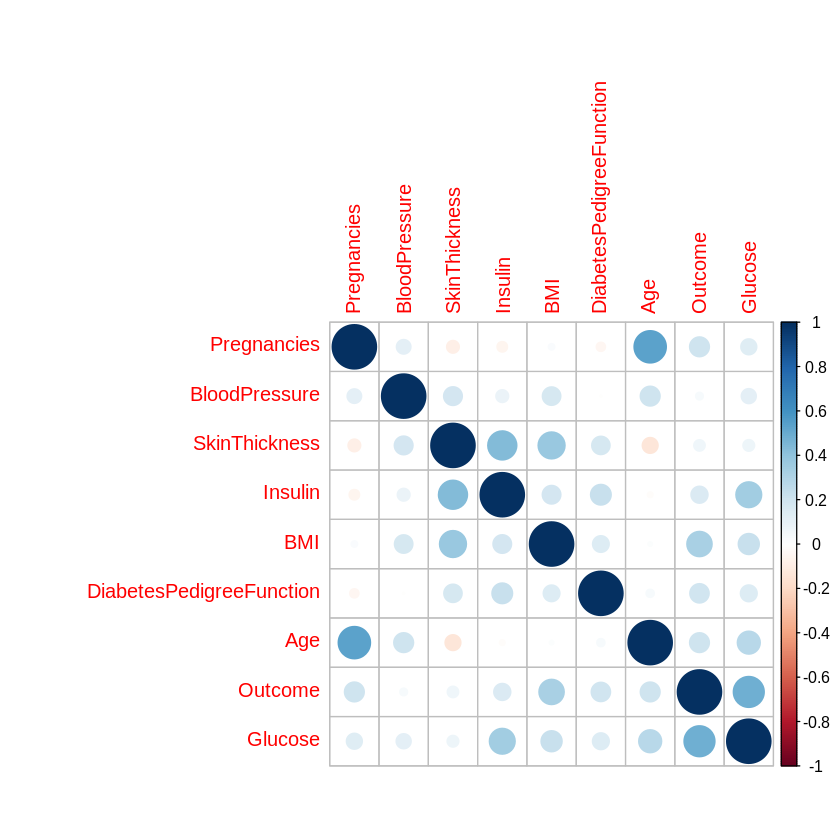

In [4]:
M <- cor(diabetes1)
corrplot(M, method = "circle")

## Display correlation coefficients

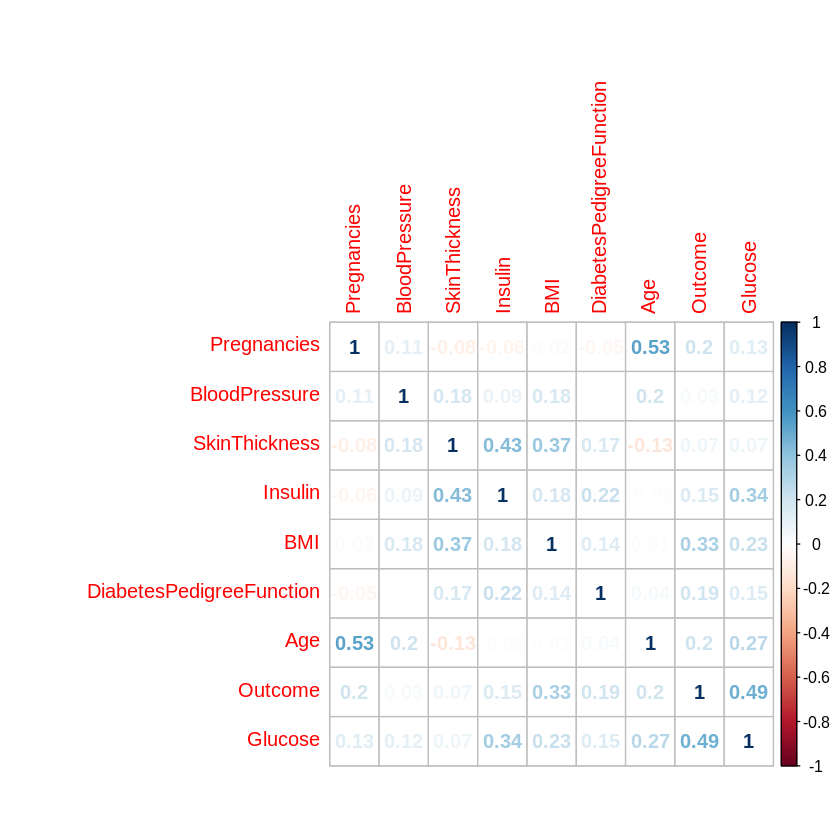

In [5]:
corrplot(M, method = "number")

## Multiple Linear Regression

### Linear regression is used to quantify the impact of features (or independent variables) on the dependent variable.

### In this case, features with a significance level of lower than 5% are kept in the model.

In [6]:
fit <- lm(Glucose ~ Pregnancies + Outcome + Age + DiabetesPedigreeFunction + BMI + Insulin + SkinThickness + BloodPressure, data=diabetes1)
summary(fit) # show results


Call:
lm(formula = Glucose ~ Pregnancies + Outcome + Age + DiabetesPedigreeFunction + 
    BMI + Insulin + SkinThickness + BloodPressure, data = diabetes1)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.709 -18.148  -2.212  15.176  80.950 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              78.401064   6.363612  12.320  < 2e-16 ***
Pregnancies              -0.481865   0.363730  -1.325  0.18575    
Outcome                  25.590805   2.384153  10.734  < 2e-16 ***
Age                       0.527262   0.106097   4.970  8.8e-07 ***
DiabetesPedigreeFunction  0.052534   3.198192   0.016  0.98690    
BMI                       0.318452   0.167106   1.906  0.05718 .  
Insulin                   0.082208   0.009843   8.352  4.8e-16 ***
SkinThickness            -0.202236   0.077372  -2.614  0.00918 ** 
BloodPressure             0.083865   0.058081   1.444  0.14929    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

In [7]:
df<-data.frame(Outcome, Age, Insulin, SkinThickness, Glucose)
attach(df)

The following objects are masked from diabetes1:

    Age, Glucose, Insulin, Outcome, SkinThickness



## Max-Min Normalization

In [8]:
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

maxmindf <- as.data.frame(lapply(df, normalize))
attach(maxmindf)
maxmindf<-as.matrix(maxmindf)

The following objects are masked from df:

    Age, Glucose, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes1:

    Age, Glucose, Insulin, Outcome, SkinThickness



## Train-validation split

In [9]:
ind <- sample(2, nrow(maxmindf), replace=TRUE, prob = c(0.7,0.3))

## Build X_train, y_train, X_val, y_val

In [10]:
X_train <- maxmindf[ind==1, 1:4]
X_val <- maxmindf[ind==2, 1:4]
y_train <- maxmindf[ind==1, 5]
y_val <- maxmindf[ind==2, 5]

# Neural Network

## Sequential model

In [11]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 12, activation = 'relu', kernel_initializer='RandomNormal', input_shape = c(4)) %>% 
  layer_dense(units = 8, activation = 'relu') %>%
  layer_dense(units = 1, activation = 'linear')

summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 12)                      60          
________________________________________________________________________________
dense_1 (Dense)                     (None, 8)                       104         
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       9           
Total params: 173
Trainable params: 173
Non-trainable params: 0
________________________________________________________________________________


## Model compilation with mean squared error used as loss function

### Model trained over 30 epochs

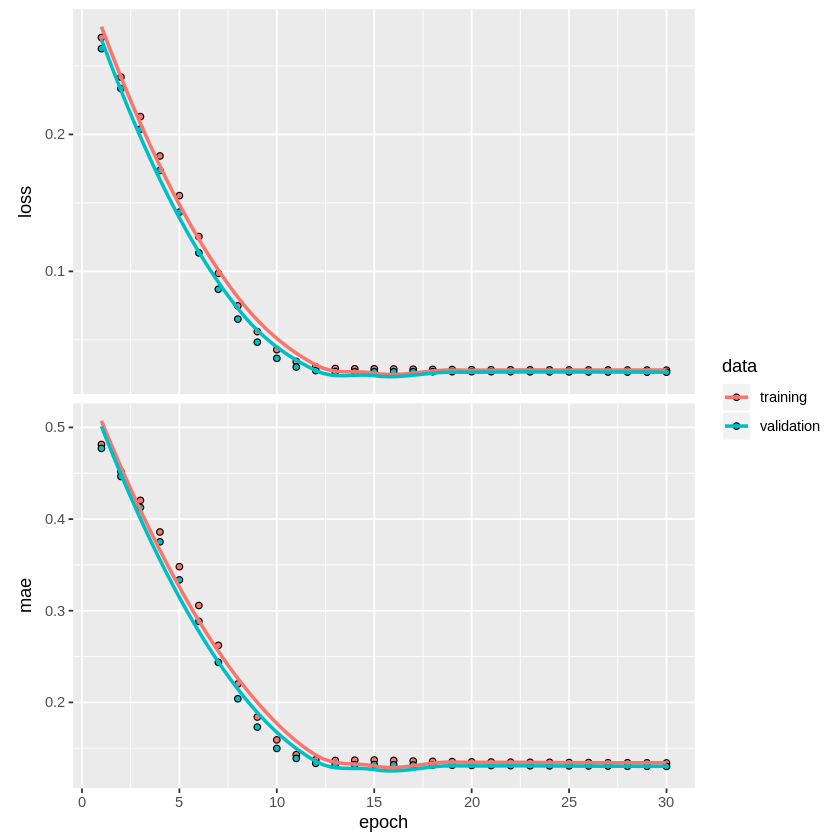

In [12]:
model %>% compile(
  loss = 'mean_squared_error',
  optimizer = 'adam',
  metrics = c('mae')
)

history <- model %>% fit(
  X_train, y_train, 
  epochs = 30, batch_size = 50, 
  validation_split = 0.2
)

plot(history)

### Model evaluation

In [13]:
model %>% evaluate(X_val, y_val)
model
pred <- data.frame(y = predict(model, as.matrix(X_val)))
predicted=pred$y * abs(diff(range(df$Glucose))) + min(df$Glucose)
actual=y_val * abs(diff(range(df$Glucose))) + min(df$Glucose)
df<-data.frame(predicted,actual)
attach(df)

$loss
[1] 0.02574332

$mae
[1] 0.1305602

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 12)                      60          
________________________________________________________________________________
dense_1 (Dense)                     (None, 8)                       104         
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       9           
Total params: 173
Trainable params: 173
Non-trainable params: 0
________________________________________________________________________________



The following objects are masked _by_ .GlobalEnv:

    actual, predicted



## Glucose level predictions

In [14]:
predicted=as.matrix(predicted)
predicted

132.0961
107.3240
102.9812
135.8483
143.6631
114.9051
132.5849
147.1762
107.0021
102.4315
106.5633


In [15]:
actual

[1] 146 120 138 129 108 125 141 125 122  83  96 101 106 101  77 135 181 109
 [19] 165 102 162 109  73 195  88 143 181 126 124 119 112 194 143 120 152  83
 [37] 179  79 115 114 148  99  99 108 108 125 119  99 113 134 109 111 154  92
 [55] 125 115 134 154  99 173 113 125  95  99 100 117  87 109 168 183 100 116
 [73] 146  88 173 180 102 130  99 109  94 100  85 194 134 110  79 105  74 109
 [91] 196  97  88  95 116  95  84 123 112 130 129 139 125 122 129 133 116 108
[109]  86 148 155 124 126 197  85 138 130 171  89 124 123 112  85 114  81  80
[127] 125 117 161 137 123 124 112  81  96 112  96  88  99 106  79 158  81 147
[145] 156 120 106 166 150 142  95 158 186 124 112 109 196 121  71 104 180 139
[163] 103  84 109 191  95  90 111 144 139  92 120

## Mean percentage error

### Percentage difference between predicted and actual values

In [16]:
install.packages("MLmetrics")
library(MLmetrics)
MAPE(predicted, actual)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘MLmetrics’

The following object is masked from ‘package:base’:

    Recall



[1] 0.1704775

## EXERCISE

### pima-indians-diabetes2.csv contains the predictor variables for the test set.

### pima-indians-diabetes3.csv contains the dependent variables (or glucose readings) for the test set.

### Your task is to use the existing model to generate new predictions for this test set and calculate the mean percentage error on these new predictions.

In [17]:
diabetes2<-read.csv("pima-indians-diabetes2.csv")
attach(diabetes2)

The following objects are masked from maxmindf:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from df (pos = 6):

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes1:

    Age, BloodPressure, BMI, DiabetesPedigreeFunction, Insulin,
    Outcome, Pregnancies, SkinThickness



In [18]:
diabetes2

Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
7,76,32,91,40.9,0.871,32,1
4,86,19,0,29.3,0.317,34,0
3,78,23,79,28.4,0.323,34,1
5,80,0,0,34.6,0.144,45,0
1,68,29,127,29.3,0.349,42,1
1,82,46,180,46.1,0.335,46,1
0,0,0,0,32.4,0.141,24,1
2,64,0,0,30.8,0.158,21,0
1,80,48,200,38.9,1.162,41,0


In [19]:
df2<-data.frame(Outcome, Age, Insulin, SkinThickness)
attach(df2)

The following objects are masked from diabetes2:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from maxmindf:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from df (pos = 7):

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes1:

    Age, Insulin, Outcome, SkinThickness



In [20]:
df2

Outcome,Age,Insulin,SkinThickness
<int>,<int>,<int>,<int>
1,32,91,32
0,34,0,19
1,34,79,23
0,45,0,0
1,42,127,29
1,46,180,46
1,24,0,0
0,21,0,0
0,41,200,48


## Max-Min Normalization

In [21]:
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

maxmindf2 <- as.data.frame(lapply(df2, normalize))
attach(maxmindf2)

The following objects are masked from df2:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes2:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from maxmindf:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from df (pos = 8):

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes1:

    Age, Insulin, Outcome, SkinThickness



## Using the predict function in R, generate predictions (pred_test) for the Glucose variable using maxmindf2.

In [22]:
pred_test <- # Complete this line...
predicted_test = pred_test$y * abs(diff(range(diabetes1$Glucose))) + min(diabetes1$Glucose)
predicted_test

ERROR: Error in eval(expr, envir, enclos): object 'pred_test' not found


## Loading test set - or unseen data for this purpose.

In [ ]:
diabetes3<-read.csv("pima-indians-diabetes3.csv")
diabetes3

## Compare predicted values with actual values.

In [ ]:
actual_test = diabetes3$Glucose
df2<-data.frame(predicted_test,actual_test)
attach(df2)
df2

## Mean percentage error calculation

In [ ]:
MAPE(predicted_test, actual_test)